## Classification with Linear Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

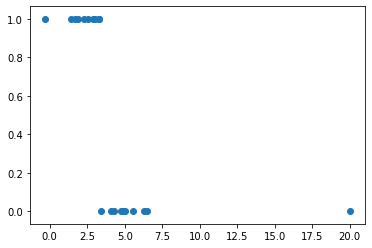

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()

0   9.16199
100   3.686091
200   3.541564
300   3.537663
400   3.5375574
500   3.5375545
600   3.5375543
700   3.5375545
800   3.5375547
900   3.5375547
Learned parameter :  [ 0.7961669  -0.06829963]


In [6]:
y_model=w_val[0]+w_val[1]*x

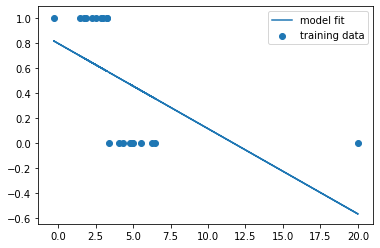

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.279461
100   3.446219
200   3.3217514
300   3.319065
400   3.3190074
500   3.3190062
600   3.319006
700   3.3190062
800   3.3190062
900   3.3190062
Learned parameter :  [ 0.80026346 -0.07257782]


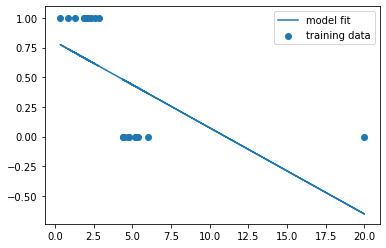

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## Logistic Regression (Classification :P)

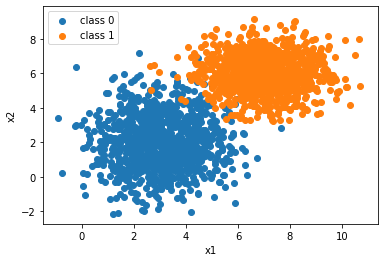

In [10]:
# Gernerate fake 2D data 
x1_l1=np.random.normal(3,1.3,[1000,1])
x1_l2=np.random.normal(7,1.2,[1000,1])
x2_l1=np.random.normal(2,1.5,[1000,1])
x2_l2=np.random.normal(6,1.1,[1000,1])
x1=np.append(x1_l1,x1_l2,axis=0)
x2=np.append(x2_l1,x2_l2,axis=0)
x=np.append(x1,x2,axis=1)
y=np.array([[0.]*len(x1_l1)+[1.]*len(x2_l2)]).T

plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
learning_rate = 0.0001
training_epochs = 3000

def sigmoid(x):
    return 1/(1+np.exp(-x))

(m,n) = x.shape

In [12]:
# define placeholders and variables
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,1])
b = tf.Variable(0.0, name='bias', dtype=tf.float32,trainable=True)
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32, trainable=True)

In [13]:
# model
y_model = tf.sigmoid(tf.matmul(X,w)+b)
#y_model = tf.sigmoid(X@w+b)
#y_model = tf.sigmoid(X[:,0]*w[0,0]+X[:,1]*w[1,0]+b)

In [14]:
# cost
cost = -tf.reduce_sum(Y*tf.log(y_model)+(1-Y)*tf.log(1-y_model))

In [15]:
# trainer
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_model,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_cost = 0
    for epoch in range(training_epochs):
        curr_cost,_ = sess.run([cost,trainer], feed_dict={X:x,Y:y})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
        if abs(prev_cost-curr_cost)<0.001:
            break
        prev_cost = curr_cost
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('Learned weights : ', w_val)
    print('Learned bias : ', b_val)
    print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:y}))
    print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:y}))
    print(sess.run(tf.greater(y_model,0.5),feed_dict={X:x,Y:y}))
    sess.close()

0   1386.2919
100   599.8262
200   419.26257
300   334.77148
400   285.48807
500   252.93663
600   229.67795
700   212.13858
800   198.3835
900   187.27063
1000   178.0812
1100   170.33838
1200   163.71338
1300   157.97192
1400   152.94145
1500   148.49258
1600   144.52606
1700   140.96457
1800   137.74628
1900   134.82217
2000   132.15202
2100   129.70273
2200   127.4471
2300   125.362076
2400   123.42819
2500   121.62906
2600   119.95052
2700   118.38033
2800   116.908005
2900   115.52424
Learned weights :  [[1.2338094]
 [1.1874554]]
Learned bias :  -11.147406
Correct predictions :  [[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Accuracy : 0.987
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


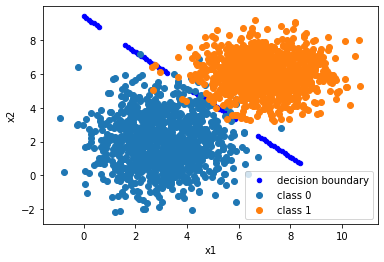

In [17]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[1] - x1_test*w_val[0] - b_val)
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20, label = 'decision boundary')
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Multiclass classification

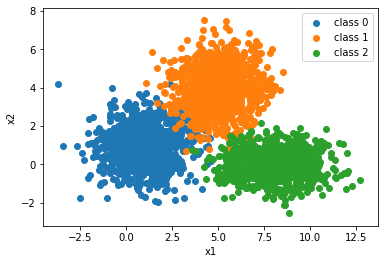

In [18]:
# Gernerate fake 2D data 
# (1,1) (5,4) (8,0)
x1_l1=np.random.normal(1,1.3,[1000,1])
x1_l2=np.random.normal(5,1.2,[1000,1])
x1_l3=np.random.normal(8,1.5,[1000,1])
x2_l1=np.random.normal(1,1.0,[1000,1])
x2_l2=np.random.normal(4,1.1,[1000,1])
x2_l3=np.random.normal(0,0.7,[1000,1])

x1=np.concatenate((x1_l1,x1_l2,x1_l3),axis=0)
x2=np.concatenate((x2_l1,x2_l2,x2_l3),axis=0)
x=np.concatenate((x1,x2),axis=1)
y=np.matrix([[1,0.,0.]]*len(x1_l1)+[[0.,1.,0.]]*len(x2_l2)+[[0.,0.,1.]]*len(x2_l3))

# preview data
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [19]:
# divide to training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7)
(train_size,n_features)=x_train.shape

In [20]:
# hyperparameters
learning_rate = 0.001
training_epochs = 500
num_classes = 3
batch_size = 100

# define placeholders, variables
X = tf.placeholder(tf.float32, [None,n_features])
Y = tf.placeholder(tf.float32, [None,num_classes])
w = tf.Variable(tf.zeros([n_features,num_classes]),dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros([1,num_classes]),dtype=tf.float32, name='bias')

# softmax model
y_model = tf.nn.softmax(X@w + b)

# cost and train op
cost = tf.reduce_sum(-Y*tf.log(y_model))
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# performance params
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs * train_size // batch_size ):
        datum = (epoch*batch_size) % train_size
        x_batch = x_train[datum: datum+batch_size,:]
        y_batch = y_train[datum: datum+batch_size,:]
        curr_cost, _ = sess.run([cost, trainer], feed_dict={X:x_batch, Y:y_batch})
        if epoch % 100 == 0:
            print(epoch, ": ", curr_cost)
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))
    w_val = sess.run(w)
    b_val = sess.run(b)

0 :  109.861206
100 :  26.530926
200 :  23.132896
300 :  21.874016
400 :  13.534776
500 :  12.276571
600 :  10.854446
700 :  7.845621
800 :  9.578091
900 :  9.85709
1000 :  6.347909
1100 :  5.351011
1200 :  4.816142
1300 :  9.323364
1400 :  5.942352
1500 :  8.014761
1600 :  5.709655
1700 :  5.7860527
1800 :  7.3184767
1900 :  4.3167696
2000 :  10.180638
2100 :  7.293349
2200 :  5.5147285
2300 :  12.562313
2400 :  10.4387245
2500 :  7.4356747
2600 :  6.657062
2700 :  6.3201
2800 :  4.358099
2900 :  5.5548925
3000 :  7.8895125
3100 :  4.1263046
3200 :  2.9623938
3300 :  2.4466038
3400 :  8.215975
3500 :  4.399459
3600 :  6.910112
3700 :  4.089839
3800 :  4.237251
3900 :  5.691242
4000 :  3.528263
4100 :  9.352135
4200 :  5.496918
4300 :  4.66053
4400 :  11.866321
4500 :  8.796661
4600 :  6.4403334
4700 :  5.8155622
4800 :  5.633765
4900 :  3.6248188
5000 :  4.5366707
5100 :  7.620809
5200 :  3.5565543
5300 :  2.3525298
5400 :  1.778205
5500 :  8.064205
5600 :  3.899415
5700 :  6.703109
5

[[9.99701259e-05 1.37599961e-17 9.71071615e-14]
 [9.20987735e-05 1.39825779e-17 1.03728661e-13]
 [8.48471881e-05 1.42087602e-17 1.10801664e-13]
 ...
 [2.02015894e-19 4.58739935e-04 1.44152043e-12]
 [1.86109759e-19 4.66160516e-04 1.53981418e-12]
 [1.71456027e-19 4.73701132e-04 1.64481034e-12]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


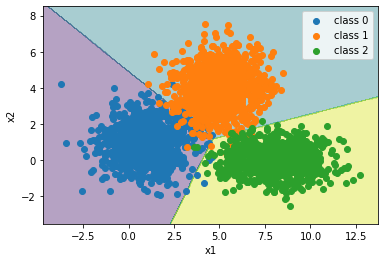

In [22]:
# obtain decision boundary
resolution = 0.05
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = softmax(xx@w_val+b_val)
print(yy)
yy = np.argmax(yy,axis=1).reshape(xx1.shape)
print(yy)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()